# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


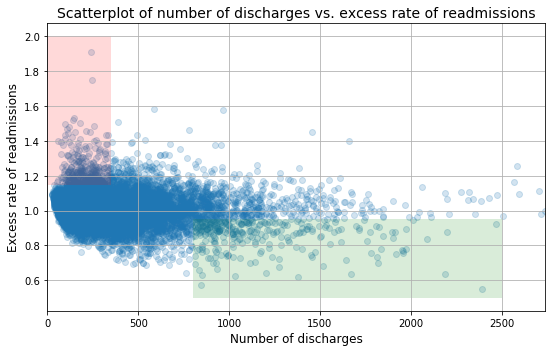

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
df_all = clean_hospital_read_df
df = df_all[['Number of Discharges', 'Excess Readmission Ratio']]
print(df.head())
print(df.info())
print(df.columns)
print(df.describe())

       Number of Discharges  Excess Readmission Ratio
16857                     0                       NaN
14582                     0                       NaN
15606                     0                       NaN
15615                     0                       NaN
14551                     0                       NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 2 columns):
Number of Discharges        11578 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 271.4 KB
None
Index(['Number of Discharges', 'Excess Readmission Ratio'], dtype='object')
       Number of Discharges  Excess Readmission Ratio
count          11578.000000              11497.000000
mean             362.909397                  1.007504
std              309.176945                  0.091964
min                0.000000                  0.549500
25%              157.000000                  0.952600
50%    

# Question A

No, I do not agree with their analysis. The analsysi is ad hoc. The number of hospitals where the number of 
discharges < 100 is 1188, about 10% about the total number of hospitals. The numbr hospitals where the number of
discharges > 1000, is 463, or about 5% about the total number of hospitals. It is erroneous to make conclusions based
on the pattern about 15% of the data, whilel while ignoring the majority 85% of the data. Naturallly, we would also need to anlayse the 85% of the data that has number of discharges between 100 and 1000. 

We would need to statistically test the hypothesis that the two variables hospital capacity (number of discharges) 
and readmission rates are correlated. Simply looking at the scatter plot does not suggest corrrelation between
the two variables is statistically significant to warrant a policy recommendation.
We recommned doing a Hypothesis test of the Pearson Correlation coefficiient.

# Question B


In [6]:
# Drop data points that have missing or Nan value for the "Number of Dischareges"
pd.to_numeric(df['Number of Discharges'])
df = df.dropna()

print(df.describe())
print(df.head())


       Number of Discharges  Excess Readmission Ratio
count          11497.000000              11497.000000
mean             365.466209                  1.007504
std              308.754590                  0.091964
min               25.000000                  0.549500
25%              160.000000                  0.952600
50%              282.000000                  1.003500
75%              474.000000                  1.058100
max             6793.000000                  1.909500
      Number of Discharges  Excess Readmission Ratio
1832                    25                    1.0914
1699                    27                    1.0961
1774                    28                    1.0934
1853                    29                    1.0908
1290                    30                    1.1123


In [7]:
# Do a Permutation test to test if the two varibles are correlated. We test the null hypothesist that the correlation 
# between number of discharges and the excess readmission ratio is zero. Or the null hypothesis is that there the
# two variables are uncorrelated.

#Compute Pearson Correlation between Number of Discharges and Excess Readmission Ratio

num_discharges = df['Number of Discharges']
ratio_excess_readmission = df['Excess Readmission Ratio']

r_obs = np.corrcoef(num_discharges, ratio_excess_readmission)[0,1]

print("Observed Correlation Coefficient is: {:.4f}".format(r_obs))

#  Initialize permutation replicates
r_permuted = np.empty(10000)

# Draw Replicates
for i in range(10000):
    num_discharges_permuted = np.random.permutation(num_discharges)
    
    # Compute Pearson's Correlation Coefficient
    r_permuted[i] = np.corrcoef(num_discharges_permuted, ratio_excess_readmission)[0,1]

# Compute the test statistic t
p = np.sum(r_permuted >= r_obs) / len(r_permuted)

print('p value: {:.4f}'.format(p))
    

Observed Correlation Coefficient is: -0.0974
p value: 1.0000


The p-value is very high, in fact its 1 > 0.01. That is, in 10,000 permutations, we don't have a sinlge value of r that is more than the observed value when the null is true. Therefore, we cannot reject the null at 1% level of 
signifiance. The implication is that we cannot conclude the two varibles are correlated at 1% level of significance.
This clearly shows the reasoning above as well as the policy recommendation is flawed. 

The scatter plot above is not very informative. The red and green coloring hightlights the data that is sparse. About
77% of data has number of discharges < 500 and excess readmission ration < 1.2. This is shown in a blue cluster
in the left center of the plot.
We recommned using a hexbin plot instead to show the scatter of the data. We highlight the 77% of the data in the
plot below. The plot below clearly shows that there is no correlation between the two variabls. 

       Number of Discharges  Excess Readmission Ratio
count           8892.000000               8892.000000
mean             237.848291                  1.011040
std              120.955957                  0.086666
min               25.000000                  0.691400
25%              136.000000                  0.956800
50%              222.000000                  1.004850
75%              331.000000                  1.057600
max              500.000000                  1.909500


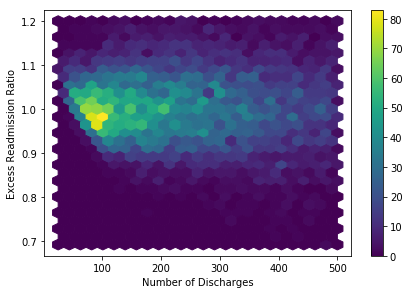

In [8]:
df_1 = df.loc[df['Number of Discharges'] <= 500]
df_2 = df_1.loc[df['Excess Readmission Ratio'] <= 1.2]
print(df_1.describe())
x = df_2['Number of Discharges']
y = df_2['Excess Readmission Ratio']
plt.hexbin(x, y, gridsize = 25)
plt.tight_layout()
plt.colorbar()
plt.xlabel("Number of Discharges")
plt.ylabel("Excess Readmission Ratio")
plt.show()